In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import vector
import numpy as np
from scipy import stats
from scipy.stats import expon
from scipy.optimize import differential_evolution

In [2]:
events = {}

evt_500_5p0_0p08 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_0p8 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_8p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_40p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_80p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root",
    schemaclass=NanoAODSchema,
).events()

In [3]:
evt_500_0p25_0p004 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p004_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_0p25_0p04 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p04_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_0p25_0p4 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-0p4_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_0p25_2p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-2p0_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_0p25_4p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-0p25_ctau-4p0_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

In [4]:
evt_500_1p2_0p019 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-0p019_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_1p2_0p19 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-0p19_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_1p2_1p9 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-1p9_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_1p2_9p6 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-9p6_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_1p2_19p0 = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/Drop/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-1p2_ctau-19p0_v2_part-0.root",
    schemaclass=NanoAODSchema,
).events()

In [19]:
events['4mu_500GeV_0p25GeV_0p004mm'] = evt_500_0p25_0p004
events['4mu_500GeV_0p25GeV_0p04mm'] = evt_500_0p25_0p04
events['4mu_500GeV_0p25GeV_0p4mm'] = evt_500_0p25_0p4
events['4mu_500GeV_0p25GeV_2p0mm'] = evt_500_0p25_2p0
events['4mu_500GeV_0p25GeV_4p0mm'] = evt_500_0p25_4p0

events['4mu_500GeV_1p2GeV_0p019mm'] = evt_500_1p2_0p019
events['4mu_500GeV_1p2GeV_0p19mm'] = evt_500_1p2_0p19
events['4mu_500GeV_1p2GeV_1p9mm'] = evt_500_1p2_1p9
events['4mu_500GeV_1p2GeV_9p6mm'] = evt_500_1p2_9p6
events['4mu_500GeV_1p2GeV_19p0mm'] = evt_500_1p2_19p0

events['4mu_500GeV_5p0GeV_0p08mm'] = evt_500_5p0_0p08
events['4mu_500GeV_5p0GeV_0p8mm'] = evt_500_5p0_0p8
events['4mu_500GeV_5p0GeV_8p0mm'] = evt_500_5p0_8p0
events['4mu_500GeV_5p0GeV_40p0mm'] = evt_500_5p0_40p0
events['4mu_500GeV_5p0GeV_80p0mm'] = evt_500_5p0_80p0

In [6]:
events_ex = {}

evt_500_5p0_0p08_ex = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/ExtraFactor/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_v3_part-1.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_0p8_ex = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/ExtraFactor/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_v3_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_8p0_ex = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/ExtraFactor/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_v3_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_40p0_ex = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/ExtraFactor/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_v3_part-0.root",
    schemaclass=NanoAODSchema,
).events()

evt_500_5p0_80p0_ex = NanoEventsFactory.from_root(
    "/home/cms-jovyan/local_data/Epsilon/ExtraFactor/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_v3_part-1.root",
    schemaclass=NanoAODSchema,
).events()

In [7]:
events_ex['4mu_500GeV_5p0GeV_0p08mm'] = evt_500_5p0_0p08_ex
events_ex['4mu_500GeV_5p0GeV_0p8mm'] = evt_500_5p0_0p8_ex
events_ex['4mu_500GeV_5p0GeV_8p0mm'] = evt_500_5p0_8p0_ex
events_ex['4mu_500GeV_5p0GeV_40p0mm'] = evt_500_5p0_40p0_ex
events_ex['4mu_500GeV_5p0GeV_80p0mm'] = evt_500_5p0_80p0_ex

In [8]:
events

{'4mu_500GeV_0p25GeV_0p004mm': <NanoEventsArray [<event 1:1:19>, ... <event 1:3:480>] type='192 * event'>,
 '4mu_500GeV_0p25GeV_0p04mm': <NanoEventsArray [<event 1:1:5>, ... <event 1:3:475>] type='216 * event'>,
 '4mu_500GeV_0p25GeV_0p4mm': <NanoEventsArray [<event 1:1:8>, ... <event 1:3:497>] type='204 * event'>,
 '4mu_500GeV_0p25GeV_2p0mm': <NanoEventsArray [<event 1:1:15>, ... <event 1:3:496>] type='221 * event'>,
 '4mu_500GeV_0p25GeV_4p0mm': <NanoEventsArray [<event 1:1:25>, ... <event 1:3:477>] type='218 * event'>,
 '4mu_500GeV_1p2GeV_0p004mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:3:499>] type='1185 * event'>,
 '4mu_500GeV_1p2GeV_0p04mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:3:498>] type='1979 * event'>,
 '4mu_500GeV_1p2GeV_0p4mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:3:499>] type='2000 * event'>,
 '4mu_500GeV_1p2GeV_2p0mm': <NanoEventsArray [<event 1:1:3>, ... <event 1:3:499>] type='2001 * event'>,
 '4mu_500GeV_1p2GeV_4p0mm': <NanoEventsArray [<event 1:

In [9]:
events_ex

{'4mu_500GeV_5p0GeV_0p08mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:3:500>] type='1986 * event'>,
 '4mu_500GeV_5p0GeV_0p8mm': <NanoEventsArray [<event 1:1:2>, ... <event 1:3:500>] type='1995 * event'>,
 '4mu_500GeV_5p0GeV_8p0mm': <NanoEventsArray [<event 1:1:2>, ... <event 1:3:500>] type='2028 * event'>,
 '4mu_500GeV_5p0GeV_40p0mm': <NanoEventsArray [<event 1:1:2>, ... <event 1:3:500>] type='1855 * event'>,
 '4mu_500GeV_5p0GeV_80p0mm': <NanoEventsArray [<event 1:1:1>, ... <event 1:3:500>] type='1347 * event'>}

In [10]:
def extract_values(events, sample):
    
    genpart = events["{0}".format(sample)].GenPart
    dps = genpart[abs(genpart.pdgId) == 32]
    mask = ak.all(abs(dps.children.pdgId) == 13, axis=-1)
    dps_tomu = dps[mask]
    
    dps_tomu_vec = vector.zip({
        "pt": dps_tomu.pt,
        "eta": dps_tomu.eta,
        "phi": dps_tomu.phi,
        "mass": dps_tomu.mass})
    
    lxyz = ak.flatten(((dps_tomu.children.vx - dps_tomu.vx)**2 + (dps_tomu.children.vy - dps_tomu.vy)**2 + (dps_tomu.children.vz - dps_tomu.vz)**2)**0.5) 
    gamma = ak.flatten(dps_tomu_vec.gamma)
    beta = ak.flatten(dps_tomu_vec.beta)
    
    print("DP mass : {0}".format(dps_tomu.mass))
    
    return lxyz, gamma, beta

In [43]:
def plotting(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    
    lxyz, gamma, beta = extract_values(events, sample)
    
    lxyz_gb = lxyz/(gamma * beta)
    P = stats.expon.fit(lxyz_gb)
    
    ax[i][j].hist(ak.flatten(lxyz_gb), range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)
    ax[i][j].plot(np.linspace(*plt_range,100), stats.expon.pdf(np.linspace(*plt_range,100), *P), label=fr"exp[ -(x - {P[0]:.3e}) / {P[1]:.3e} ] / {P[1]:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18, loc='upper right')
    ax[i][j].set_xlabel(r"$V_{xyz}$/$\beta\gamma$")

DP mass : [[5, 5], [5, 4.88], [4.95, 5.02], [5, 5.02], ... 5, 5.02], [4.98, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 5], [5, 5.03], [5, 5], ... [5.08, 5], [4.98, 5.02], [5, 5], [4.98, 5]]
DP mass : [[5, 4.95], [5, 5], [5, 5.05], [5, 5.02, ... 4.98], [5, 5.02], [4.98, 5], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [4.91, 5], [5, 5], [4.94, ... 5], [5, 5.02], [5, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 4.94], [5.02, 5], [4.98, 4.95], ... [5, 5], [5, 5], [5, 5], [4.95, 5]]


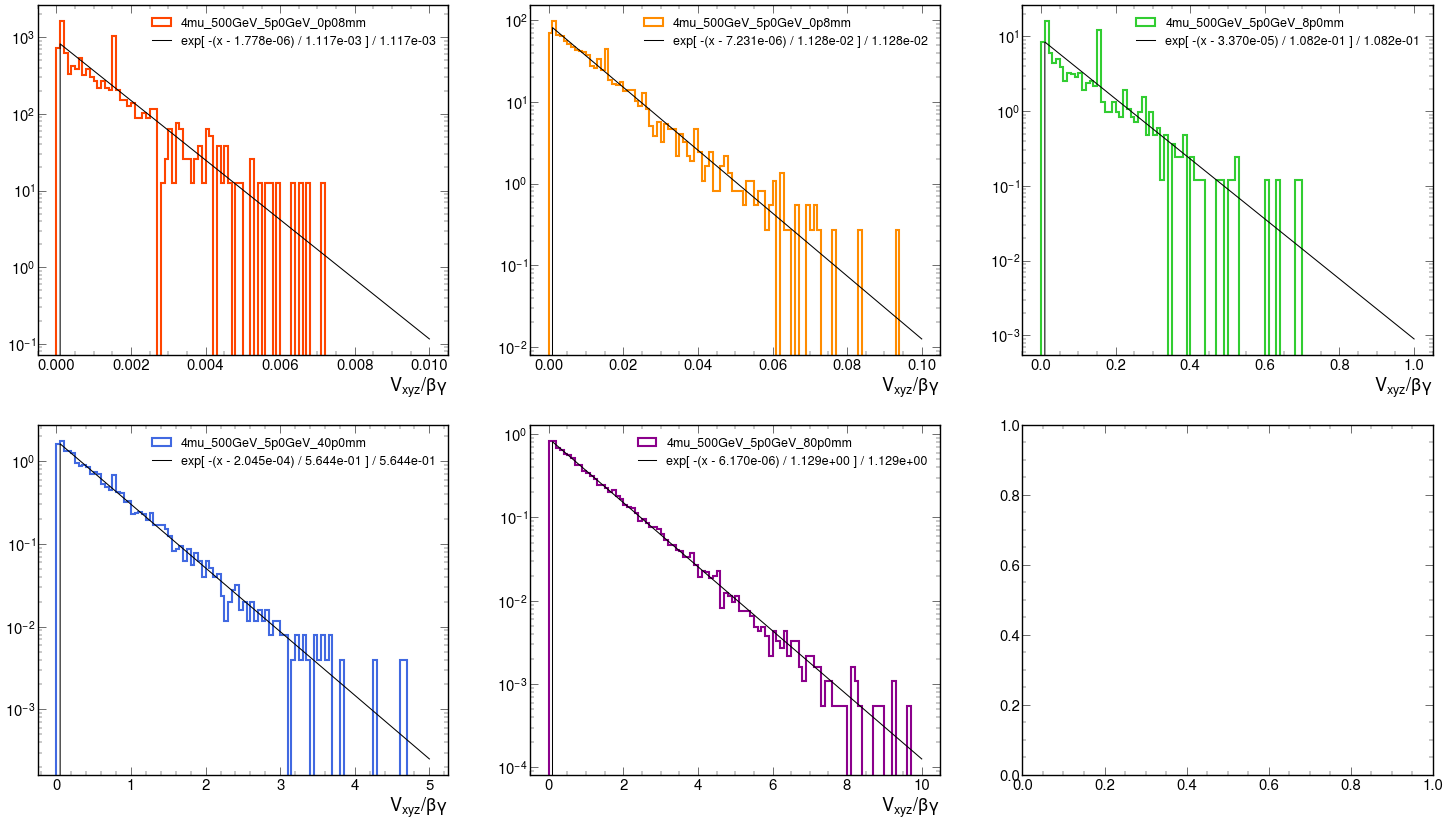

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events_4mu, "4mu_500GeV_5p0GeV_0p08mm", 0.01,0,0, "orangered")
plotting(events_4mu, "4mu_500GeV_5p0GeV_0p8mm", 0.1,0,1, "darkorange")
plotting(events_4mu, "4mu_500GeV_5p0GeV_8p0mm", 1,0,2, "limegreen")
plotting(events_4mu, "4mu_500GeV_5p0GeV_40p0mm", 5,1,0, "royalblue")
plotting(events_4mu, "4mu_500GeV_5p0GeV_80p0mm", 10,1,1, "darkmagenta")

In [11]:
pip install zfit

  Obtaining dependency information for zfit from https://files.pythonhosted.org/packages/da/b5/8f9bfaef73a1407f591ff9194e4f5fc5f9e82c0d824648462d9b86d57a3f/zfit-0.22.0-py2.py3-none-any.whl.metadata
  Using cached zfit-0.22.0-py2.py3-none-any.whl.metadata (44 kB)
  Obtaining dependency information for colored from https://files.pythonhosted.org/packages/75/d1/548f697f88872321525e294f8863efbdd1c313964b7f94e49ab0dc4f2895/colored-2.2.4-py3-none-any.whl.metadata
  Using cached colored-2.2.4-py3-none-any.whl.metadata (3.6 kB)
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Obtaining dependency information for deprecated from https://files.pythonhosted.org/packages/20/8d/778b7d51b981a96554f29136cd59ca7880bf58094338085bcf2a979a0e6a/Deprecated-1.2.14-py2.py3-none-any.whl.metadata

In [12]:
import zfit

/opt/conda/lib/python3.9/site-packages/zfit/__init__.py:60: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
2024-09-09 18:46:35.315216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 18:46:35.332230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-09 18:46:35.332254: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
def zfit_plotting(events, sample, ranges, i, j, co):
    
    plt_range = (0, ranges)
    rho, gamma, beta = extract_values(events, sample)
    
    lxyz_gb = ak.to_numpy(ak.flatten(rho/(gamma * beta)))
    obs_space = zfit.Space("lxyz_gb", limits=plt_range)
    data = zfit.Data.from_numpy(obs=obs_space, array=lxyz_gb)
    
    lambda_param = zfit.Parameter("lambda", 1)
    exp_model = zfit.pdf.Exponential(lambda_param, obs=obs_space)

    nll = zfit.loss.UnbinnedNLL(model=exp_model, data=data)

    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll)
    param_val = result.params[lambda_param]['value']
    
    offset = 0
    scale_param = 1 / param_val

    ax[i][j].hist(lxyz_gb, range=plt_range, linewidth=3, bins=100, histtype='step', label=sample, density=True, color=co)

    x_vals = np.linspace(*plt_range, 100)
    pdf_vals = exp_model.pdf(x_vals, norm_range=obs_space)
    ax[i][j].plot(x_vals, pdf_vals, label=fr"exp[ -(x - {offset:.3e}) / {scale_param:.3e} ] / {scale_param:.3e}", color='black')
    ax[i][j].set_yscale("log")
    ax[i][j].legend(fontsize=18, loc='upper right')
    ax[i][j].set_xlabel(r"$L_{xyz}$/$\beta\gamma$")

DP mass : [[0.276, 0.238], [0.261, 0.259], [0.276, ... 0.32], [0.288, 0.256], [0.242, 0.249]]
DP mass : [[0.314, 0.273], [0.272, 0.355], [0.248, ... 0.251], [0.305, 0.247], [0.248, 0.276]]
DP mass : [[0.247, 0.264], [0.25, 0.26], [0.264, ... 0.242], [0.262, 0.286], [0.305, 0.265]]
DP mass : [[0.258, 0.259], [0.269, 0.263], [0.29, ... 0.243], [0.249, 0.309], [0.255, 0.285]]
DP mass : [[0.25, 0.252], [0.253, 0.253], [0.254, ... 0.364], [0.249, 0.243], [0.334, 0.312]]


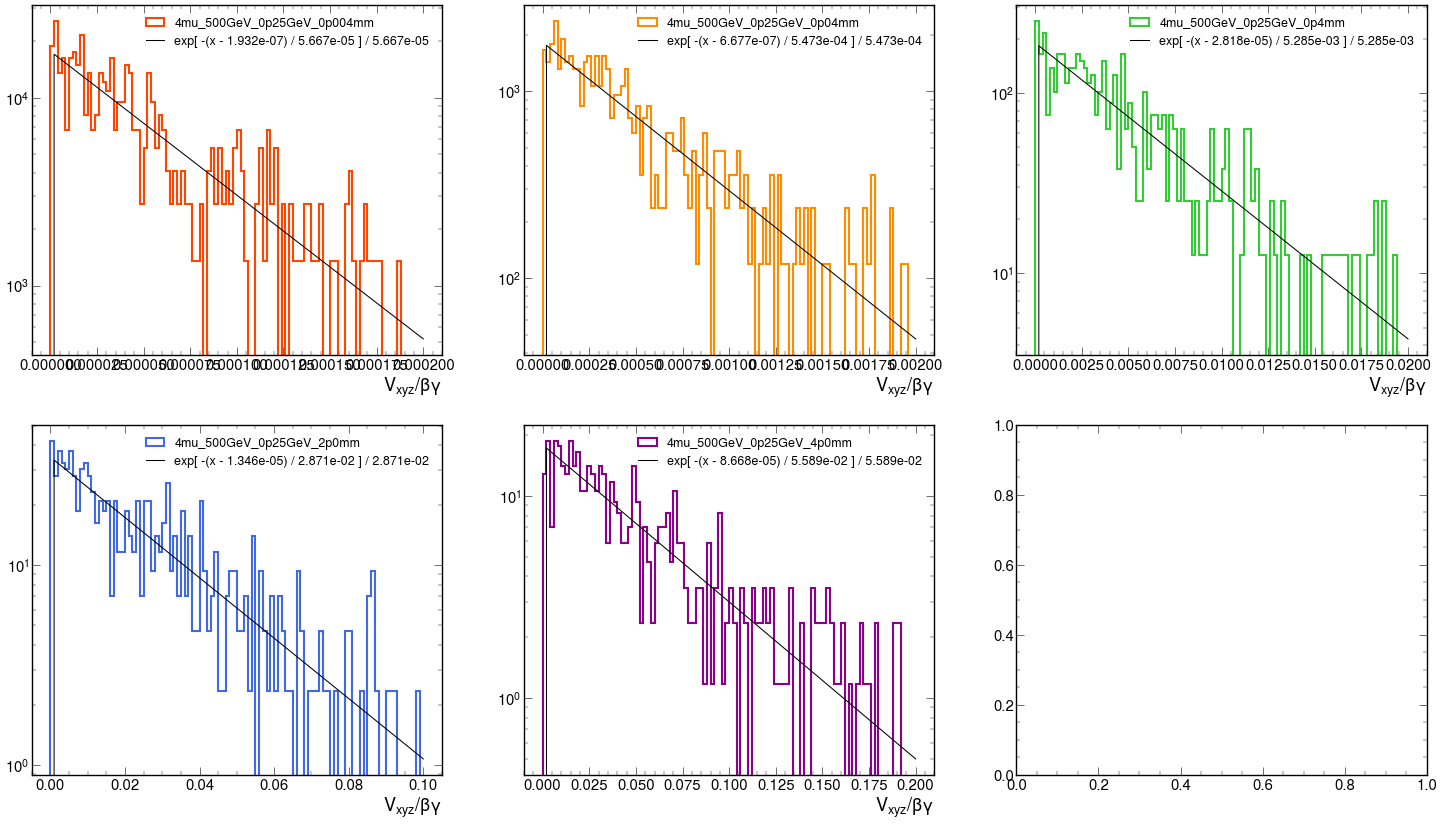

In [44]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events, "4mu_500GeV_0p25GeV_0p004mm", 0.0002,0,0, "orangered")
plotting(events, "4mu_500GeV_0p25GeV_0p04mm", 0.002,0,1, "darkorange")
plotting(events, "4mu_500GeV_0p25GeV_0p4mm", 0.02,0,2, "limegreen")
plotting(events, "4mu_500GeV_0p25GeV_2p0mm", 0.1,1,0, "royalblue")
plotting(events, "4mu_500GeV_0p25GeV_4p0mm", 0.2,1,1, "darkmagenta")

DP mass : [[0.276, 0.238], [0.261, 0.259], [0.276, ... 0.32], [0.288, 0.256], [0.242, 0.249]]
DP mass : [[0.314, 0.273], [0.272, 0.355], [0.248, ... 0.251], [0.305, 0.247], [0.248, 0.276]]
DP mass : [[0.247, 0.264], [0.25, 0.26], [0.264, ... 0.242], [0.262, 0.286], [0.305, 0.265]]
DP mass : [[0.258, 0.259], [0.269, 0.263], [0.29, ... 0.243], [0.249, 0.309], [0.255, 0.285]]
DP mass : [[0.25, 0.252], [0.253, 0.253], [0.254, ... 0.364], [0.249, 0.243], [0.334, 0.312]]


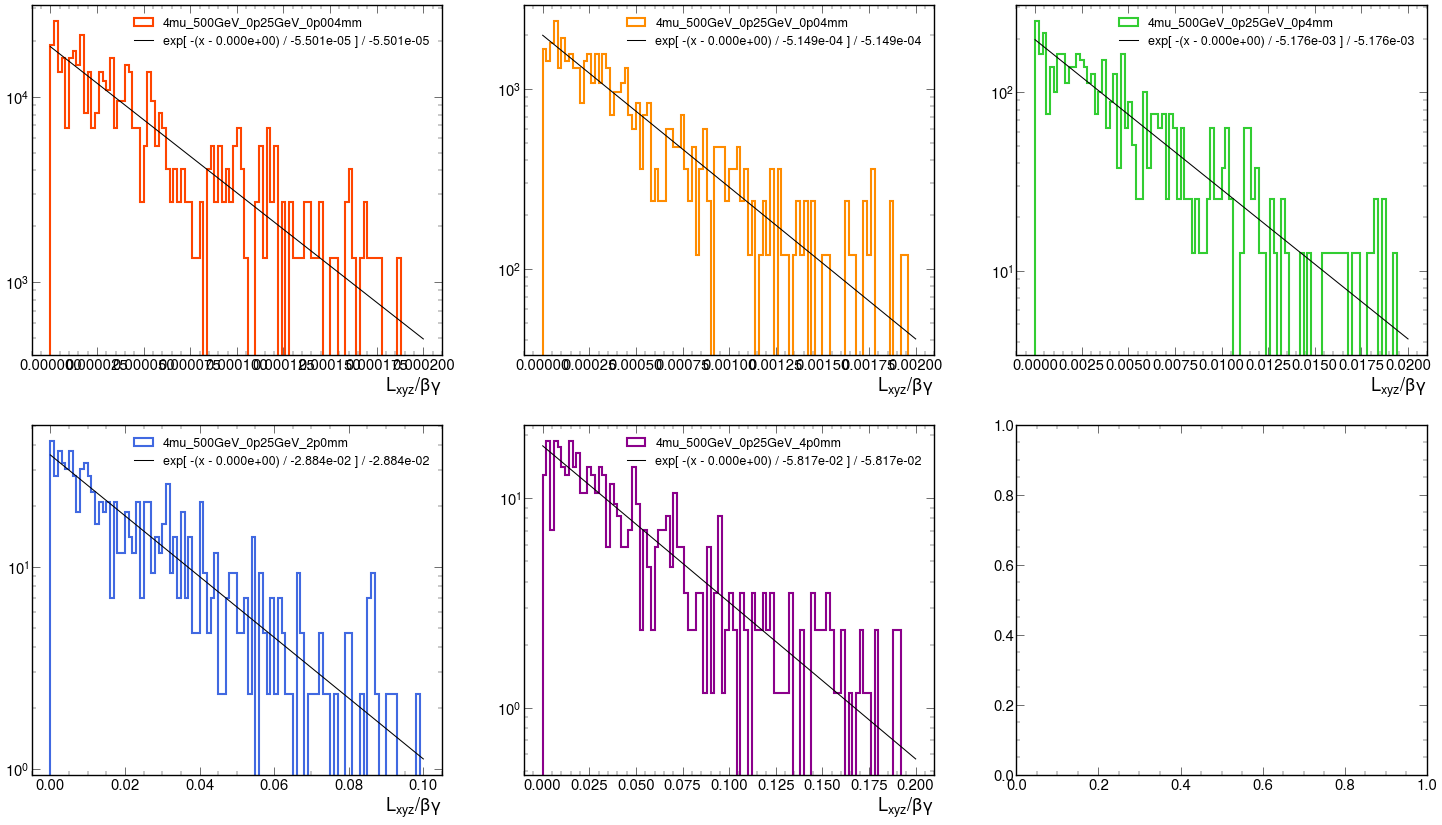

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

zfit_plotting(events, "4mu_500GeV_0p25GeV_0p004mm", 0.0002,0,0, "orangered")
zfit_plotting(events, "4mu_500GeV_0p25GeV_0p04mm", 0.002,0,1, "darkorange")
zfit_plotting(events, "4mu_500GeV_0p25GeV_0p4mm", 0.02,0,2, "limegreen")
zfit_plotting(events, "4mu_500GeV_0p25GeV_2p0mm", 0.1,1,0, "royalblue")
zfit_plotting(events, "4mu_500GeV_0p25GeV_4p0mm", 0.2,1,1, "darkmagenta")

DP mass : [[1.2, 1.2], [1.2, 1.2], [1.21, 1.2], ... [1.21, 1.2], [1.2, 1.3], [1.22, 1.21]]
DP mass : [[1.2, 1.2], [1.2, 1.21], [1.2, 1.22], ... [1.18, 1.19], [1.19, 1.2], [1.16, 1.2]]
DP mass : [[1.2, 1.18], [1.21, 1.19], [1.21, 1.2], ... [1.19, 1.15], [1.2, 1.2], [1.33, 1.2]]
DP mass : [[1.2, 1.21], [1.19, 1.2], [1.2, 1.16], ... [1.13, 1.21], [1.2, 1.2], [1.19, 1.17]]
DP mass : [[1.2, 1.2], [1.11, 1.2], [1.2, 1.2], ... [1.2, 1.23], [1.23, 1.18], [1.25, 1.2]]


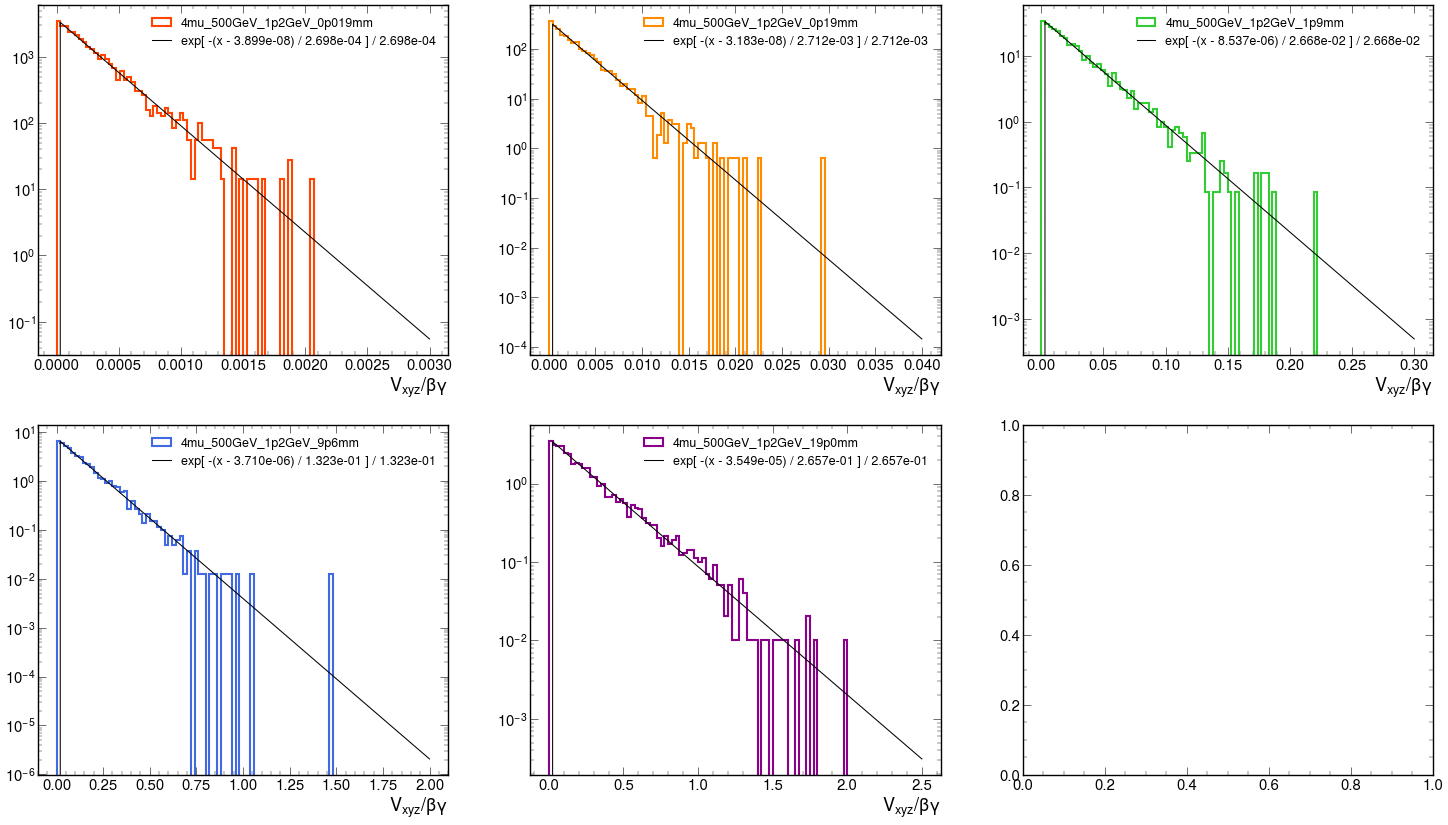

In [45]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events, "4mu_500GeV_1p2GeV_0p019mm", 0.003,0,0, "orangered")
plotting(events, "4mu_500GeV_1p2GeV_0p19mm", 0.04,0,1, "darkorange")
plotting(events, "4mu_500GeV_1p2GeV_1p9mm", 0.3,0,2, "limegreen")
plotting(events, "4mu_500GeV_1p2GeV_9p6mm", 2,1,0, "royalblue")
plotting(events, "4mu_500GeV_1p2GeV_19p0mm", 2.5,1,1, "darkmagenta")

DP mass : [[1.2, 1.2], [1.2, 1.2], [1.21, 1.2], ... [1.21, 1.2], [1.2, 1.3], [1.22, 1.21]]
DP mass : [[1.2, 1.2], [1.2, 1.21], [1.2, 1.22], ... [1.18, 1.19], [1.19, 1.2], [1.16, 1.2]]
DP mass : [[1.2, 1.18], [1.21, 1.19], [1.21, 1.2], ... [1.19, 1.15], [1.2, 1.2], [1.33, 1.2]]
DP mass : [[1.2, 1.21], [1.19, 1.2], [1.2, 1.16], ... [1.13, 1.21], [1.2, 1.2], [1.19, 1.17]]
DP mass : [[1.2, 1.2], [1.11, 1.2], [1.2, 1.2], ... [1.2, 1.23], [1.23, 1.18], [1.25, 1.2]]


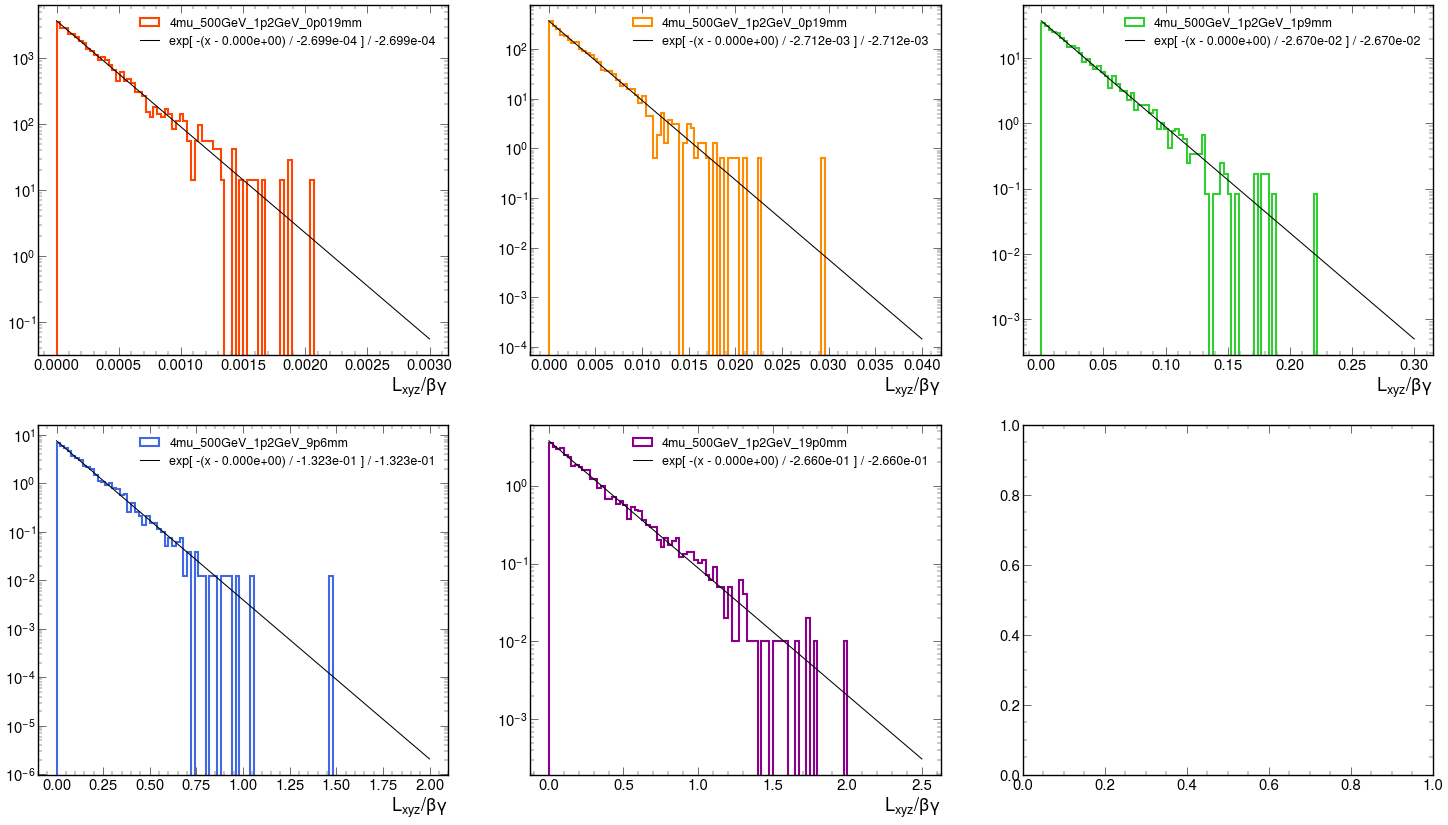

In [24]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

zfit_plotting(events, "4mu_500GeV_1p2GeV_0p019mm", 0.003,0,0, "orangered")
zfit_plotting(events, "4mu_500GeV_1p2GeV_0p19mm", 0.04,0,1, "darkorange")
zfit_plotting(events, "4mu_500GeV_1p2GeV_1p9mm", 0.3,0,2, "limegreen")
zfit_plotting(events, "4mu_500GeV_1p2GeV_9p6mm", 2,1,0, "royalblue")
zfit_plotting(events, "4mu_500GeV_1p2GeV_19p0mm", 2.5,1,1, "darkmagenta")

DP mass : [[5, 5], [5, 4.88], [4.95, 5.02], [5, 5.02], ... 5, 5.02], [4.98, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 5], [5, 5.03], [5, 5], ... [5.08, 5], [4.98, 5.02], [5, 5], [4.98, 5]]
DP mass : [[5, 4.95], [5, 5], [5, 5.05], [5, 5.02, ... 4.98], [5, 5.02], [4.98, 5], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [4.91, 5], [5, 5], [4.94, ... 5], [5, 5.02], [5, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 4.94], [5.02, 5], [4.98, 4.95], ... [5, 5], [5, 5], [5, 5], [4.95, 5]]


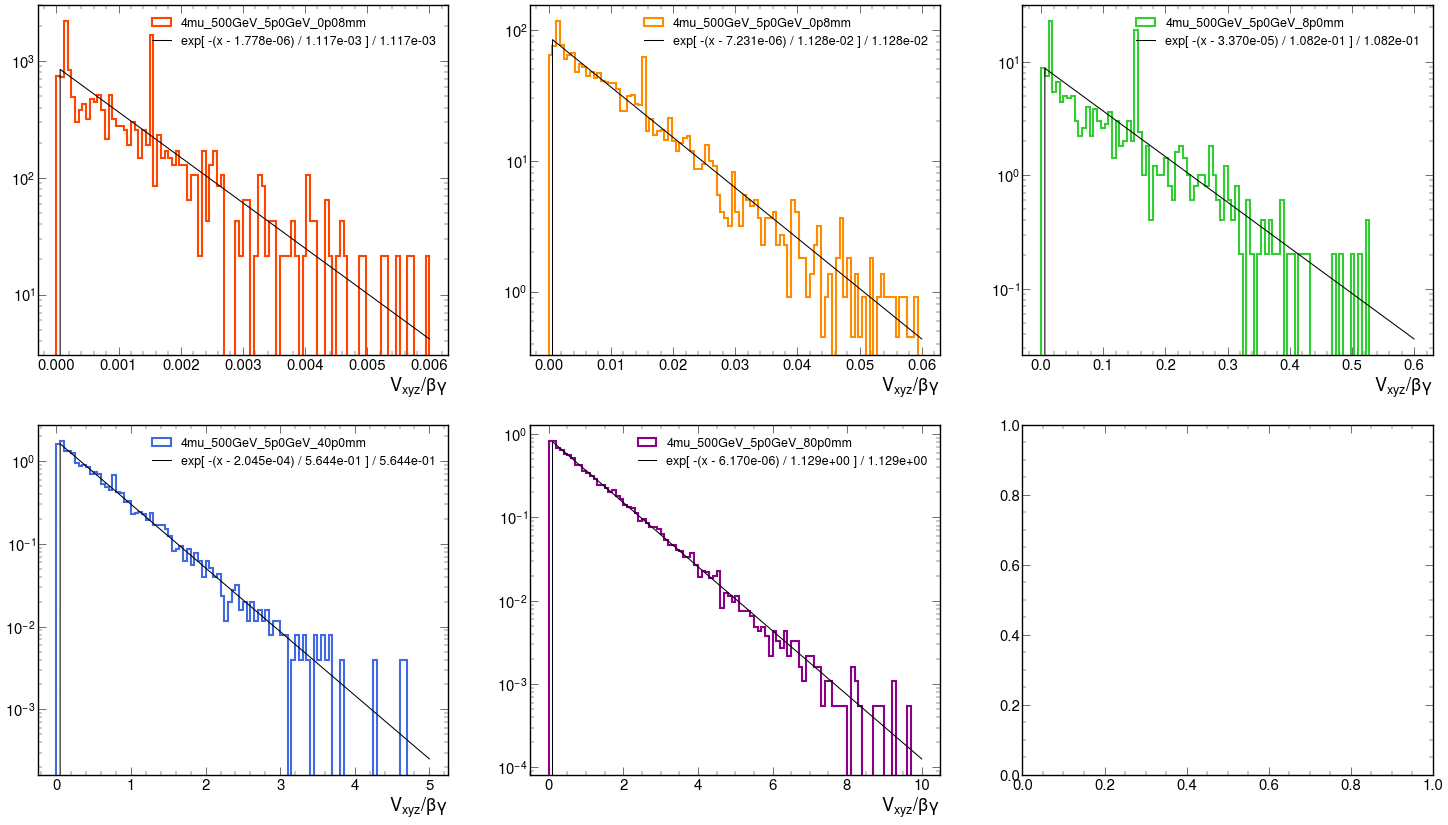

In [46]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events, "4mu_500GeV_5p0GeV_0p08mm", 0.006,0,0, "orangered")
plotting(events, "4mu_500GeV_5p0GeV_0p8mm", 0.06,0,1, "darkorange")
plotting(events, "4mu_500GeV_5p0GeV_8p0mm", 0.6,0,2, "limegreen")
plotting(events, "4mu_500GeV_5p0GeV_40p0mm", 5,1,0, "royalblue")
plotting(events, "4mu_500GeV_5p0GeV_80p0mm", 10,1,1, "darkmagenta")

DP mass : [[5, 5], [5, 4.88], [4.95, 5.02], [5, 5.02], ... 5, 5.02], [4.98, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 5], [5, 5.03], [5, 5], ... [5.08, 5], [4.98, 5.02], [5, 5], [4.98, 5]]
DP mass : [[5, 4.95], [5, 5], [5, 5.05], [5, 5.02, ... 4.98], [5, 5.02], [4.98, 5], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [4.91, 5], [5, 5], [4.94, ... 5], [5, 5.02], [5, 5], [5, 5], [5, 5]]
DP mass : [[5, 5], [5, 4.94], [5.02, 5], [4.98, 4.95], ... [5, 5], [5, 5], [5, 5], [4.95, 5]]


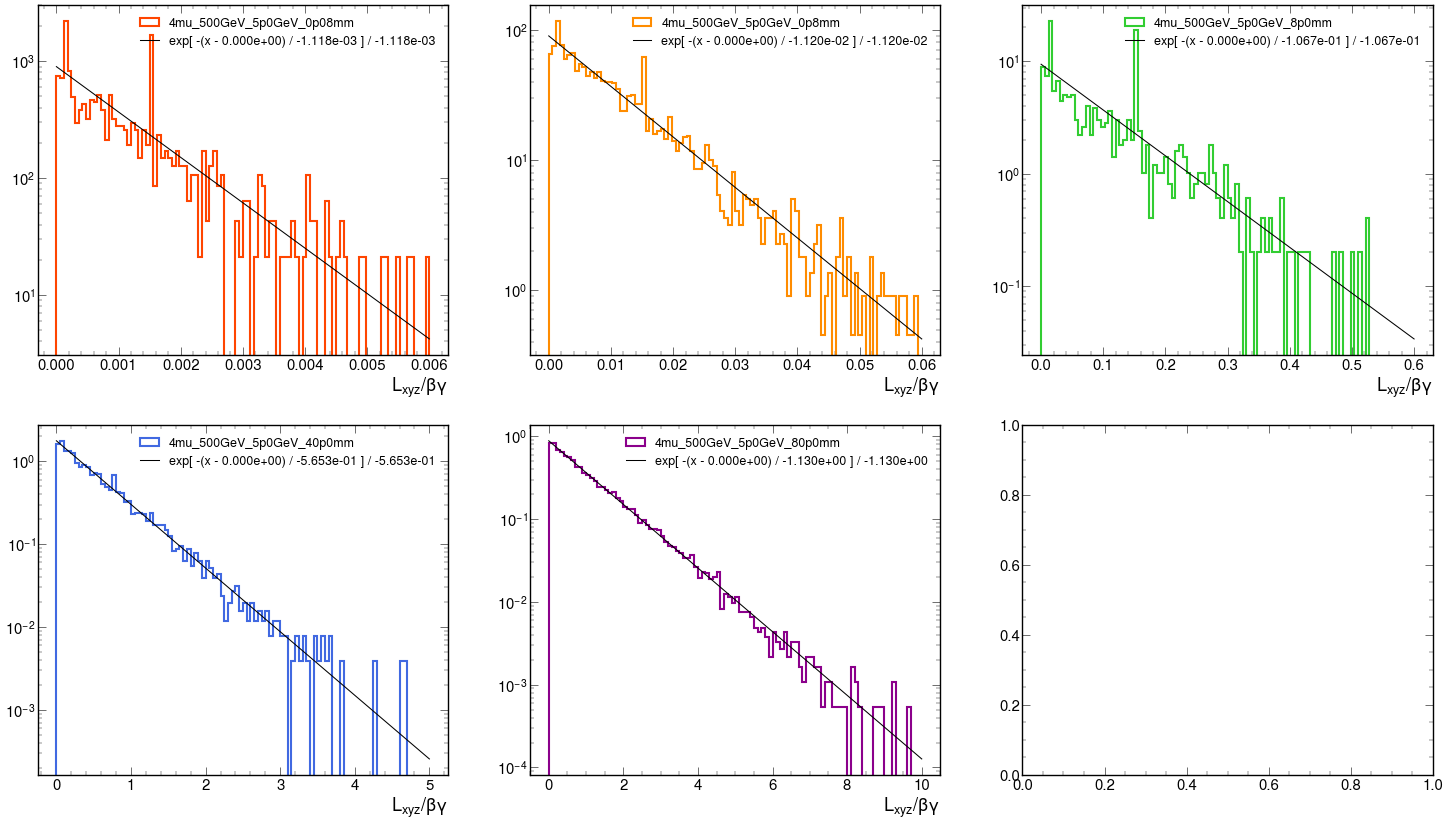

In [37]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

zfit_plotting(events, "4mu_500GeV_5p0GeV_0p08mm", 0.006,0,0, "orangered")
zfit_plotting(events, "4mu_500GeV_5p0GeV_0p8mm", 0.06,0,1, "darkorange")
zfit_plotting(events, "4mu_500GeV_5p0GeV_8p0mm", 0.6,0,2, "limegreen")
zfit_plotting(events, "4mu_500GeV_5p0GeV_40p0mm", 5,1,0, "royalblue")
zfit_plotting(events, "4mu_500GeV_5p0GeV_80p0mm", 10,1,1, "darkmagenta")

DP mass : [[5, 5], [5.02, 5], [5, 5], [5.08, 5], [5, ... 5], [5, 5], [5, 5], [5, 4.97], [5, 5]]
DP mass : [[5, 4.98], [4.98, 5], [5, 5.05], [4.98, ... 5.02], [5, 5], [4.97, 5], [5, 4.95]]
DP mass : [[5.02, 5], [5, 5.02], [5, 5], [5, 5], ... [5, 5], [5, 5], [5, 4.95], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [5, 5.11], [5, 5], ... [5.02, 5], [5.02, 5.03], [4.98, 5], [5, 5]]
DP mass : [[5, 5.02], [5.02, 5], [5.05, 5], [5, 5], ... 5, 5.11], [5.02, 4.98], [5, 5], [5, 5]]


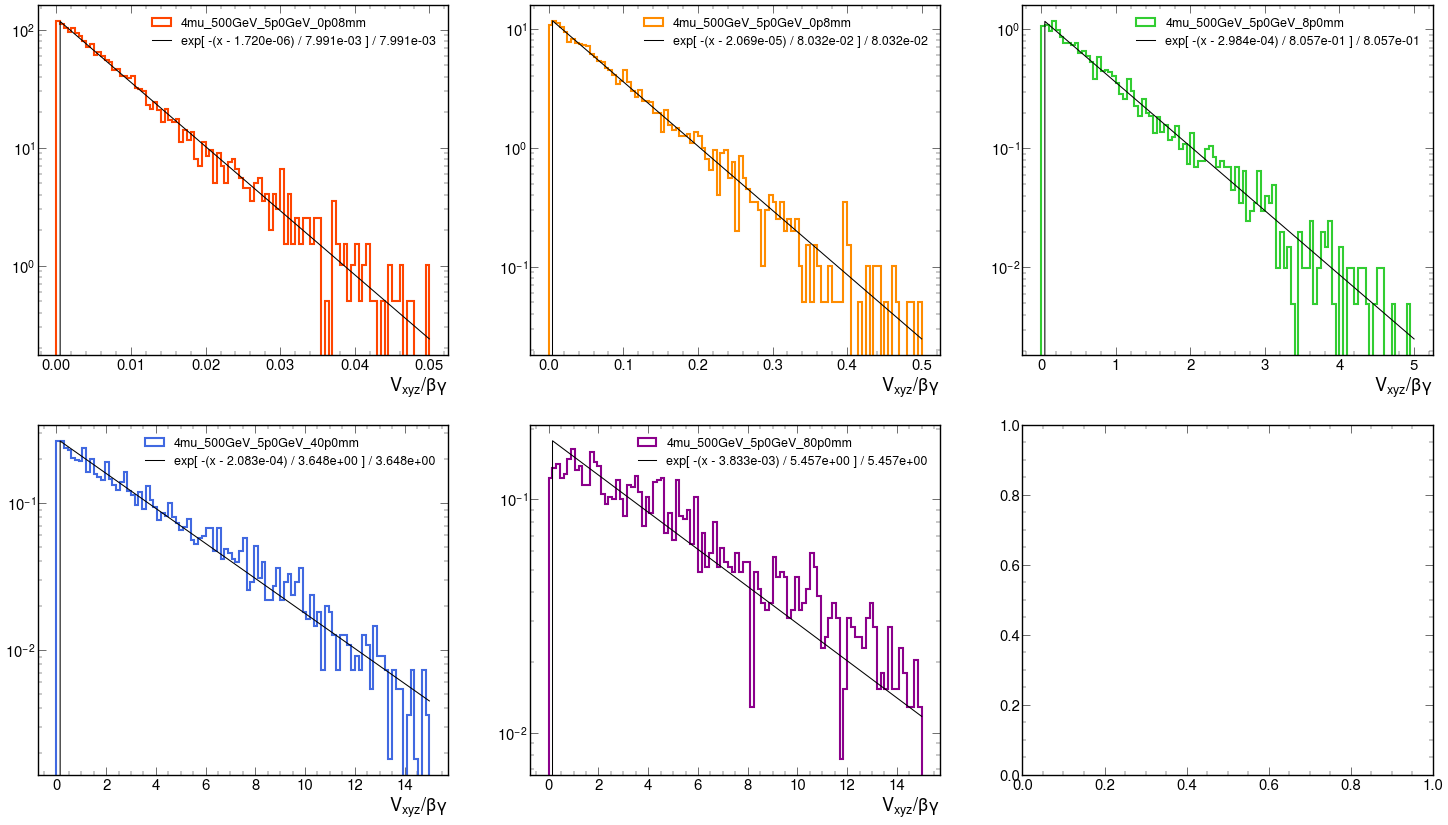

In [47]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

plotting(events_ex, "4mu_500GeV_5p0GeV_0p08mm", 0.05,0,0, "orangered")
plotting(events_ex, "4mu_500GeV_5p0GeV_0p8mm", 0.5,0,1, "darkorange")
plotting(events_ex, "4mu_500GeV_5p0GeV_8p0mm", 5,0,2, "limegreen")
plotting(events_ex, "4mu_500GeV_5p0GeV_40p0mm", 15,1,0, "royalblue")
plotting(events_ex, "4mu_500GeV_5p0GeV_80p0mm", 15,1,1, "darkmagenta")

DP mass : [[5, 5], [5.02, 5], [5, 5], [5.08, 5], [5, ... 5], [5, 5], [5, 5], [5, 4.97], [5, 5]]
DP mass : [[5, 4.98], [4.98, 5], [5, 5.05], [4.98, ... 5.02], [5, 5], [4.97, 5], [5, 4.95]]
DP mass : [[5.02, 5], [5, 5.02], [5, 5], [5, 5], ... [5, 5], [5, 5], [5, 4.95], [5, 5.02]]
DP mass : [[5, 5], [5, 5], [5, 5.11], [5, 5], ... [5.02, 5], [5.02, 5.03], [4.98, 5], [5, 5]]
DP mass : [[5, 5.02], [5.02, 5], [5.05, 5], [5, 5], ... 5, 5.11], [5.02, 4.98], [5, 5], [5, 5]]


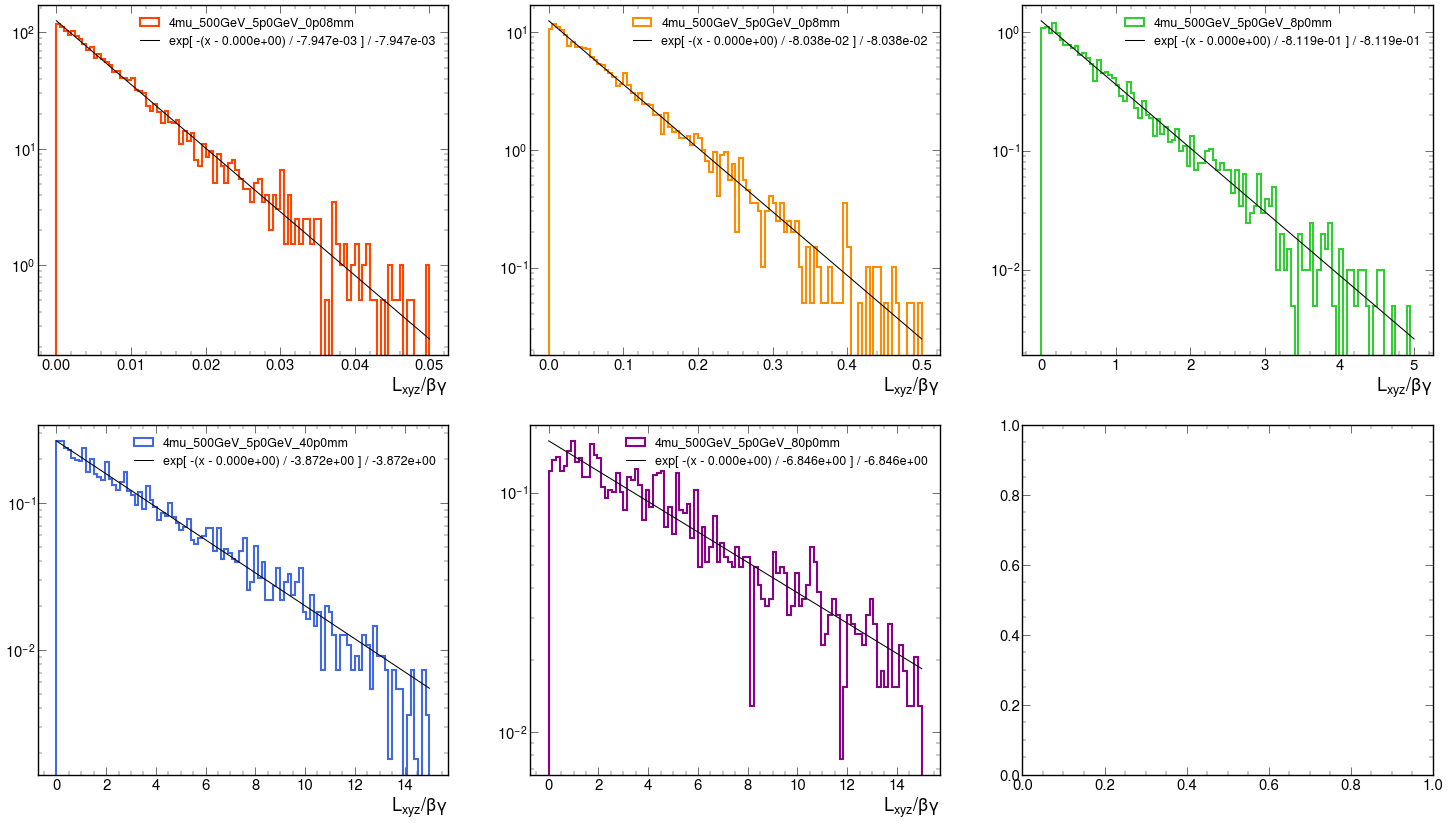

In [40]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36, 20)) 

zfit_plotting(events_ex, "4mu_500GeV_5p0GeV_0p08mm", 0.05,0,0, "orangered")
zfit_plotting(events_ex, "4mu_500GeV_5p0GeV_0p8mm", 0.5,0,1, "darkorange")
zfit_plotting(events_ex, "4mu_500GeV_5p0GeV_8p0mm", 5,0,2, "limegreen")
zfit_plotting(events_ex, "4mu_500GeV_5p0GeV_40p0mm", 15,1,0, "royalblue")
zfit_plotting(events_ex, "4mu_500GeV_5p0GeV_80p0mm", 15,1,1, "darkmagenta")